In [1]:
from qaravan.tensorQ import *
from qaravan.core import *

In [2]:
# testing if we can prepare GHZ state
gate_list = [H(0), CNOT([1,0], 3), CNOT([2,1], 3)]
circ = Circuit(gate_list, 3)
print(circ)

sv = StatevectorSim(circ)
final_state = sv.run()
print(sv)

H gate on site(s) [0] 
bottom heavy CNOT2 gate on site(s) [0, 1] 
bottom heavy CNOT2 gate on site(s) [1, 2]


100%|██████████| 3/3 [00:00<00:00, 6174.15it/s]

0.7071+0.0000j|000⟩ + 0.7071+0.0000j|111⟩


In [3]:
# testing local expectations
local_ops = [pauli_Z, pauli_Z, pauli_Z]
sv.local_expectation(local_ops) # should be zero

array(0.)

In [4]:
# testing local expectations again
local_ops = [pauli_X, pauli_X, pauli_X]
sv.local_expectation(local_ops) # should be 1

array(1.)

In [ ]:
# testing measure_sv() 

n = 3
sv = random_sv(n)
meas_sites = [0]
outcomes = measure_sv(sv, meas_sites, shots=int(1e7))

In [16]:
import random
def subsample(shots, subsample_size): 
    return random.choices(shots, k=subsample_size)

In [23]:
true_density_vec = np.diag(rdm_from_sv(sv, meas_sites)).real
num_instances = 5
subsample_sizes = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
mean_errs = []
std_errs = []
for subsample_size in subsample_sizes:
    errs = []
    for _ in range(num_instances):
        subsample_shots = subsample(outcomes, subsample_size)
        subsample_density_vec = shots_to_density_vec(subsample_shots)
        err = np.linalg.norm(true_density_vec - subsample_density_vec, ord=2)
        errs.append(err)
    mean_errs.append(np.mean(errs))
    std_errs.append(np.std(errs)/np.sqrt(num_instances))

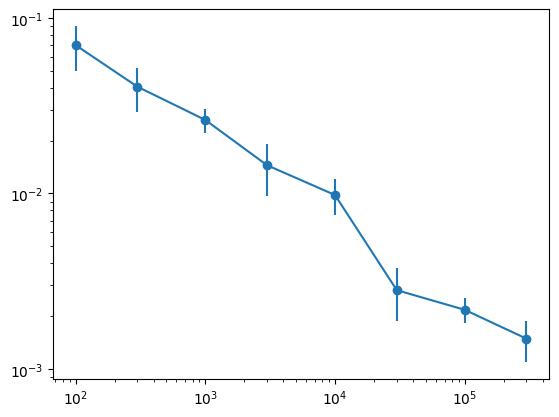

In [24]:
plt.errorbar(subsample_sizes, mean_errs, yerr=std_errs, marker='o')
plt.xscale('log')
plt.yscale('log')